In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
from ztfquery.lightcurve import LCQuery
from astropy.coordinates import SkyCoord 
from astropy.cosmology import WMAP9 as cosmo
from nuztf.style import output_folder, big_fontsize, base_width, base_height, dpi
from nuztf.observation_log import get_most_recent_obs
from astropy.io import fits
from astropy.table import Table
import logging
import sys
from nuztf.parse_nu_gcn import find_gcn_no, parse_gcn_circular
from nuztf.irsa import plot_irsa_lightcurve
from style import output_folder

In [2]:
# Set up logging level
logger = logging.getLogger()
handler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

In [3]:
names = [
#     ("MCG +00-02-020", "IC190922B"),
    ("WISEA J205314.58+125218.9", "IC191001A"),
#     ("ZTF19abexshr", "IC191001A"),
#     ("CGCG 67-27", "IC200109A"),
    ("SDSS J105752.69+105037.9", "IC200109A"),
#     ("NPM 1G+12.0265", "IC200109A"),
    ("SDSS J104431.98+110105.6", "IC200109A"),
#     ("ZTF18aamjqes", "IC200530A"),
    ("WISEA J170539.32+273641.2", "IC200530A"),
    ("WISEA J165707.06+234643.8", "IC200530A"),
#     ("ZTF18adbbnry", "IC200916A"),
#     ("ZTF20aamoxyt", "IC200929A"),
#     ("ZTF18abxrpgu", "IC201130A"),
    ("SDSS J002553.11-091252.1", "IC201209A"),
    ("4C 05.57", "IC210210A"),
    ("SDSS J134034.75+045241.3", "IC210210A"),
    ("WISE J224645.73+122935.7", "IC210629A"),
]

INFO:nuztf.irsa:Using Astropy CDS query for name WISEA J205314.58+125218.9 (RA=313.310756 deg, Dec=12.8719178 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name WISEA J205314.58+125218.9 (RA=313.310756 deg, Dec=12.8719178 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:No redshift found


nuztf.irsa - INFO - No redshift found


INFO:nuztf.irsa:There are a total of 1008 detections for WISEA J205314.58+125218.9


nuztf.irsa - INFO - There are a total of 1008 detections for WISEA J205314.58+125218.9


INFO:nuztf.irsa:Most recent detection on 2021-09-03T07:59:00.001 UT at a magnitude of r=18.53+/-0.03


nuztf.irsa - INFO - Most recent detection on 2021-09-03T07:59:00.001 UT at a magnitude of r=18.53+/-0.03


INFO:root:No GCN found for IC191001A on GCN page, checking archive instead. The latest page is 145


root - INFO - No GCN found for IC191001A on GCN page, checking archive instead. The latest page is 145


INFO:root:Match is  IceCube-191001A (GCN #25913)


Found match to IC191001A:  IceCube-191001A
root - INFO - Match is  IceCube-191001A (GCN #25913)


INFO:nuztf.irsa:Using Astropy CDS query for name SDSS J105752.69+105037.9 (RA=164.46954638 deg, Dec=10.84387068 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name SDSS J105752.69+105037.9 (RA=164.46954638 deg, Dec=10.84387068 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:Found a redshift of 0.2202


nuztf.irsa - INFO - Found a redshift of 0.2202


INFO:nuztf.irsa:There are a total of 511 detections for SDSS J105752.69+105037.9


nuztf.irsa - INFO - There are a total of 511 detections for SDSS J105752.69+105037.9


INFO:nuztf.irsa:Most recent detection on 2021-06-12T04:39:59.003 UT at a magnitude of i=17.49+/-0.02


nuztf.irsa - INFO - Most recent detection on 2021-06-12T04:39:59.003 UT at a magnitude of i=17.49+/-0.02


INFO:root:No GCN found for IC200109A on GCN page, checking archive instead. The latest page is 145


root - INFO - No GCN found for IC200109A on GCN page, checking archive instead. The latest page is 145


INFO:root:Match is  IceCube-200109A: IceCube observation of a high-energy neutrino candidate event<br (GCN #26696)


Found match to IC200109A:  IceCube-200109A: IceCube observation of a high-energy neutrino candidate event<br
root - INFO - Match is  IceCube-200109A: IceCube observation of a high-energy neutrino candidate event<br (GCN #26696)


INFO:nuztf.irsa:Using Astropy CDS query for name SDSS J104431.98+110105.6 (RA=161.13327034 deg, Dec=11.01823609 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name SDSS J104431.98+110105.6 (RA=161.13327034 deg, Dec=11.01823609 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:Found a redshift of 0.16862


nuztf.irsa - INFO - Found a redshift of 0.16862


INFO:nuztf.irsa:There are a total of 480 detections for SDSS J104431.98+110105.6


nuztf.irsa - INFO - There are a total of 480 detections for SDSS J104431.98+110105.6


INFO:nuztf.irsa:Most recent detection on 2021-06-12T04:41:20.003 UT at a magnitude of i=16.87+/-0.02


nuztf.irsa - INFO - Most recent detection on 2021-06-12T04:41:20.003 UT at a magnitude of i=16.87+/-0.02


INFO:root:No GCN found for IC200109A on GCN page, checking archive instead. The latest page is 145


root - INFO - No GCN found for IC200109A on GCN page, checking archive instead. The latest page is 145


INFO:root:Match is  IceCube-200109A: IceCube observation of a high-energy neutrino candidate event<br (GCN #26696)


Found match to IC200109A:  IceCube-200109A: IceCube observation of a high-energy neutrino candidate event<br
root - INFO - Match is  IceCube-200109A: IceCube observation of a high-energy neutrino candidate event<br (GCN #26696)


INFO:nuztf.irsa:Using Astropy CDS query for name WISEA J170539.32+273641.2 (RA=256.4138559 deg, Dec=27.6114586 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name WISEA J170539.32+273641.2 (RA=256.4138559 deg, Dec=27.6114586 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:No redshift found


nuztf.irsa - INFO - No redshift found


INFO:nuztf.irsa:There are a total of 1987 detections for WISEA J170539.32+273641.2


nuztf.irsa - INFO - There are a total of 1987 detections for WISEA J170539.32+273641.2


INFO:nuztf.irsa:Most recent detection on 2021-09-03T06:38:01.997 UT at a magnitude of g=20.09+/-0.11


nuztf.irsa - INFO - Most recent detection on 2021-09-03T06:38:01.997 UT at a magnitude of g=20.09+/-0.11


INFO:root:No GCN found for IC200530A on GCN page, checking archive instead. The latest page is 145


root - INFO - No GCN found for IC200530A on GCN page, checking archive instead. The latest page is 145


INFO:root:Match is  IceCube-200530A (GCN #27865)


Found match to IC200530A:  IceCube-200530A
root - INFO - Match is  IceCube-200530A (GCN #27865)


INFO:nuztf.irsa:Using Astropy CDS query for name WISEA J165707.06+234643.8 (RA=254.2794307 deg, Dec=23.7788465 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name WISEA J165707.06+234643.8 (RA=254.2794307 deg, Dec=23.7788465 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:No redshift found


nuztf.irsa - INFO - No redshift found


INFO:nuztf.irsa:There are a total of 2183 detections for WISEA J165707.06+234643.8


nuztf.irsa - INFO - There are a total of 2183 detections for WISEA J165707.06+234643.8


INFO:nuztf.irsa:Most recent detection on 2021-09-03T06:38:01.997 UT at a magnitude of g=18.85+/-0.04


nuztf.irsa - INFO - Most recent detection on 2021-09-03T06:38:01.997 UT at a magnitude of g=18.85+/-0.04


INFO:root:No GCN found for IC200530A on GCN page, checking archive instead. The latest page is 145


root - INFO - No GCN found for IC200530A on GCN page, checking archive instead. The latest page is 145


INFO:root:Match is  IceCube-200530A (GCN #27865)


Found match to IC200530A:  IceCube-200530A
root - INFO - Match is  IceCube-200530A (GCN #27865)


INFO:nuztf.irsa:Using Astropy CDS query for name SDSS J002553.11-091252.1 (RA=6.47133053 deg, Dec=-9.21450922 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name SDSS J002553.11-091252.1 (RA=6.47133053 deg, Dec=-9.21450922 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:Found a redshift of 1.213613


nuztf.irsa - INFO - Found a redshift of 1.213613


INFO:nuztf.irsa:There are a total of 629 detections for SDSS J002553.11-091252.1


nuztf.irsa - INFO - There are a total of 629 detections for SDSS J002553.11-091252.1


INFO:nuztf.irsa:Most recent detection on 2021-09-03T09:58:08.003 UT at a magnitude of g=17.78+/-0.03


nuztf.irsa - INFO - Most recent detection on 2021-09-03T09:58:08.003 UT at a magnitude of g=17.78+/-0.03


INFO:root:Match is  IceCube-201209A: IceCube observation of a high-energy neutrino candidate event<br (GCN #29012)


Found match to IC201209A:  IceCube-201209A: IceCube observation of a high-energy neutrino candidate event<br
root - INFO - Match is  IceCube-201209A: IceCube observation of a high-energy neutrino candidate event<br (GCN #29012)


INFO:nuztf.irsa:Using Astropy CDS query for name 4C 05.57 (RA=205.68177079 deg, Dec=5.07561668 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name 4C 05.57 (RA=205.68177079 deg, Dec=5.07561668 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:Found a redshift of 0.136483


nuztf.irsa - INFO - Found a redshift of 0.136483


INFO:nuztf.irsa:There are a total of 484 detections for 4C 05.57


nuztf.irsa - INFO - There are a total of 484 detections for 4C 05.57


INFO:nuztf.irsa:Most recent detection on 2021-07-24T04:35:52.002 UT at a magnitude of g=18.31+/-0.04


nuztf.irsa - INFO - Most recent detection on 2021-07-24T04:35:52.002 UT at a magnitude of g=18.31+/-0.04


INFO:root:Match is  IceCube-210210A: IceCube observation of a high-energy neutrino candidate event<br (GCN #29454)


Found match to IC210210A:  IceCube-210210A: IceCube observation of a high-energy neutrino candidate event<br
root - INFO - Match is  IceCube-210210A: IceCube observation of a high-energy neutrino candidate event<br (GCN #29454)


INFO:nuztf.irsa:Using Astropy CDS query for name SDSS J134034.75+045241.3 (RA=205.14484526 deg, Dec=4.87814167 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name SDSS J134034.75+045241.3 (RA=205.14484526 deg, Dec=4.87814167 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


INFO:nuztf.irsa:Found a redshift of 0.770133


nuztf.irsa - INFO - Found a redshift of 0.770133


INFO:nuztf.irsa:There are a total of 481 detections for SDSS J134034.75+045241.3


nuztf.irsa - INFO - There are a total of 481 detections for SDSS J134034.75+045241.3


INFO:nuztf.irsa:Most recent detection on 2021-07-24T04:35:52.002 UT at a magnitude of g=18.01+/-0.03


nuztf.irsa - INFO - Most recent detection on 2021-07-24T04:35:52.002 UT at a magnitude of g=18.01+/-0.03


INFO:root:Match is  IceCube-210210A: IceCube observation of a high-energy neutrino candidate event<br (GCN #29454)


Found match to IC210210A:  IceCube-210210A: IceCube observation of a high-energy neutrino candidate event<br
root - INFO - Match is  IceCube-210210A: IceCube observation of a high-energy neutrino candidate event<br (GCN #29454)


INFO:nuztf.irsa:Using Astropy CDS query for name WISE J224645.73+122935.7 (RA=341.69053427 deg, Dec=12.49321771 deg)


nuztf.irsa - INFO - Using Astropy CDS query for name WISE J224645.73+122935.7 (RA=341.69053427 deg, Dec=12.49321771 deg)


INFO:nuztf.irsa:Querying NED to check for a redshift


nuztf.irsa - INFO - Querying NED to check for a redshift


--------


nuztf.irsa - WARNING - Found multiple redshifts: Redshift
--------


INFO:nuztf.irsa:There are a total of 864 detections for WISE J224645.73+122935.7


nuztf.irsa - INFO - There are a total of 864 detections for WISE J224645.73+122935.7


INFO:nuztf.irsa:Most recent detection on 2021-09-03T07:38:42.996 UT at a magnitude of r=16.64+/-0.01


nuztf.irsa - INFO - Most recent detection on 2021-09-03T07:38:42.996 UT at a magnitude of r=16.64+/-0.01


INFO:root:Match is  IceCube-210629A (GCN #30342)


Found match to IC210629A:  IceCube-210629A
root - INFO - Match is  IceCube-210629A (GCN #30342)


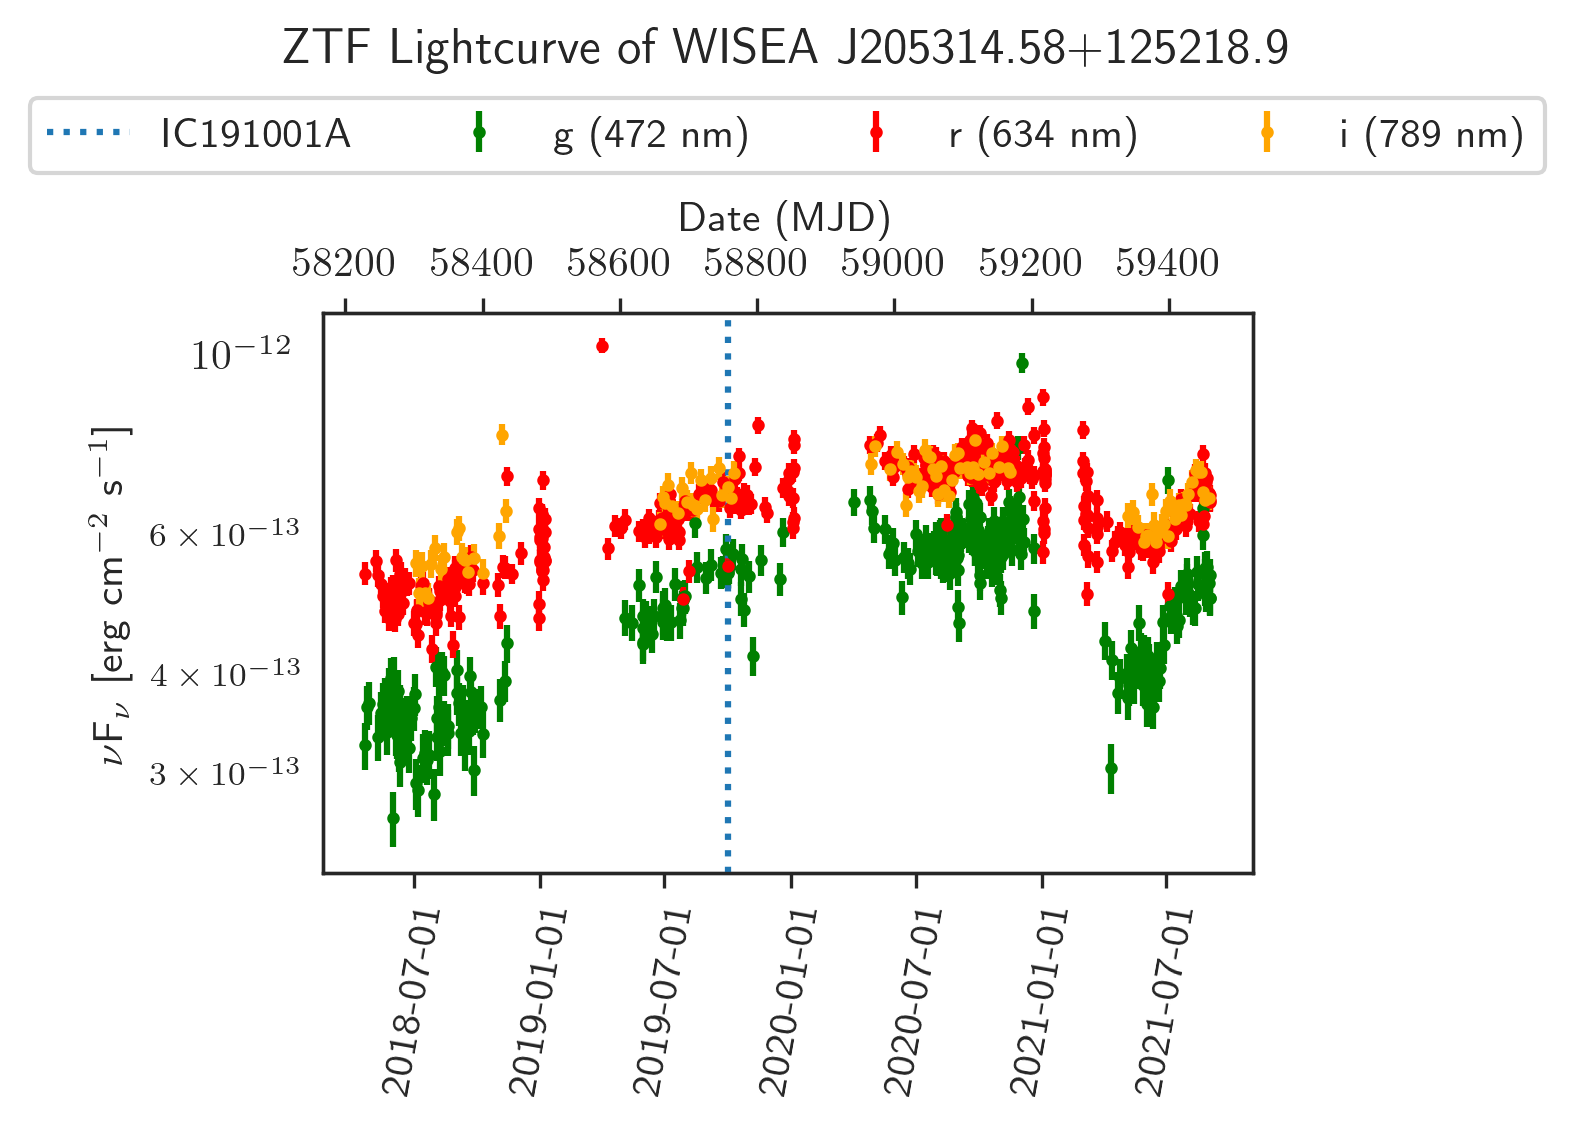

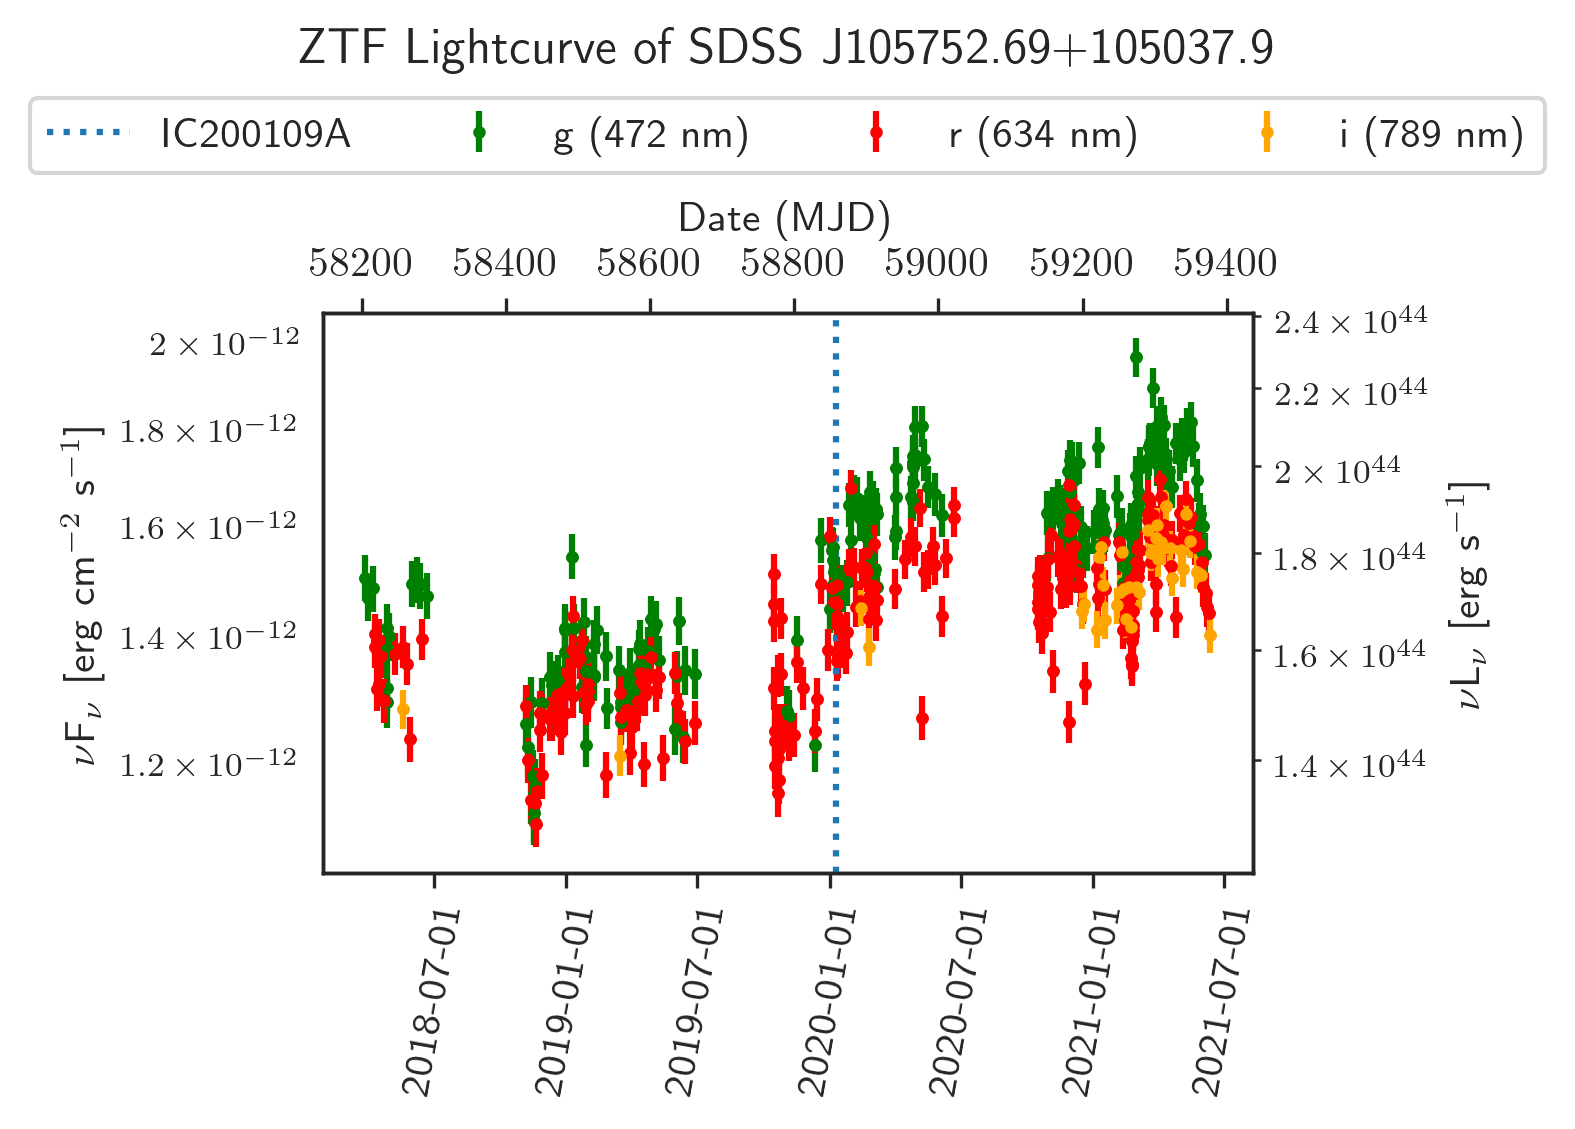

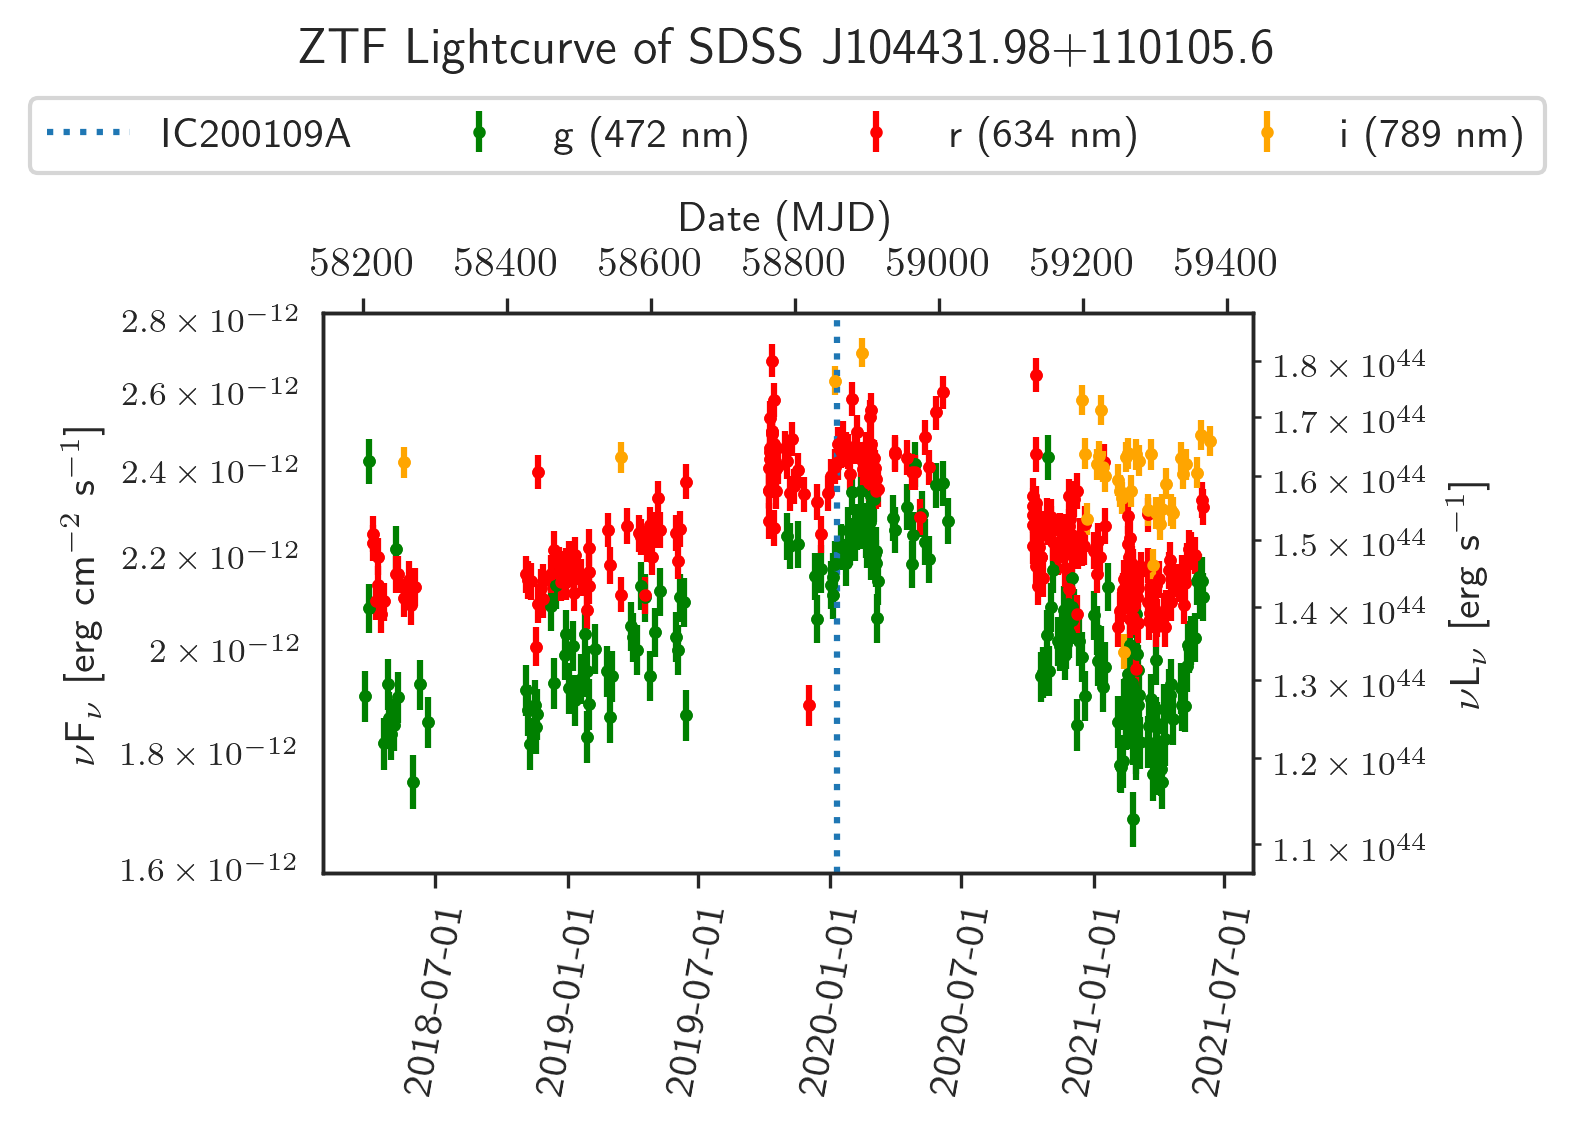

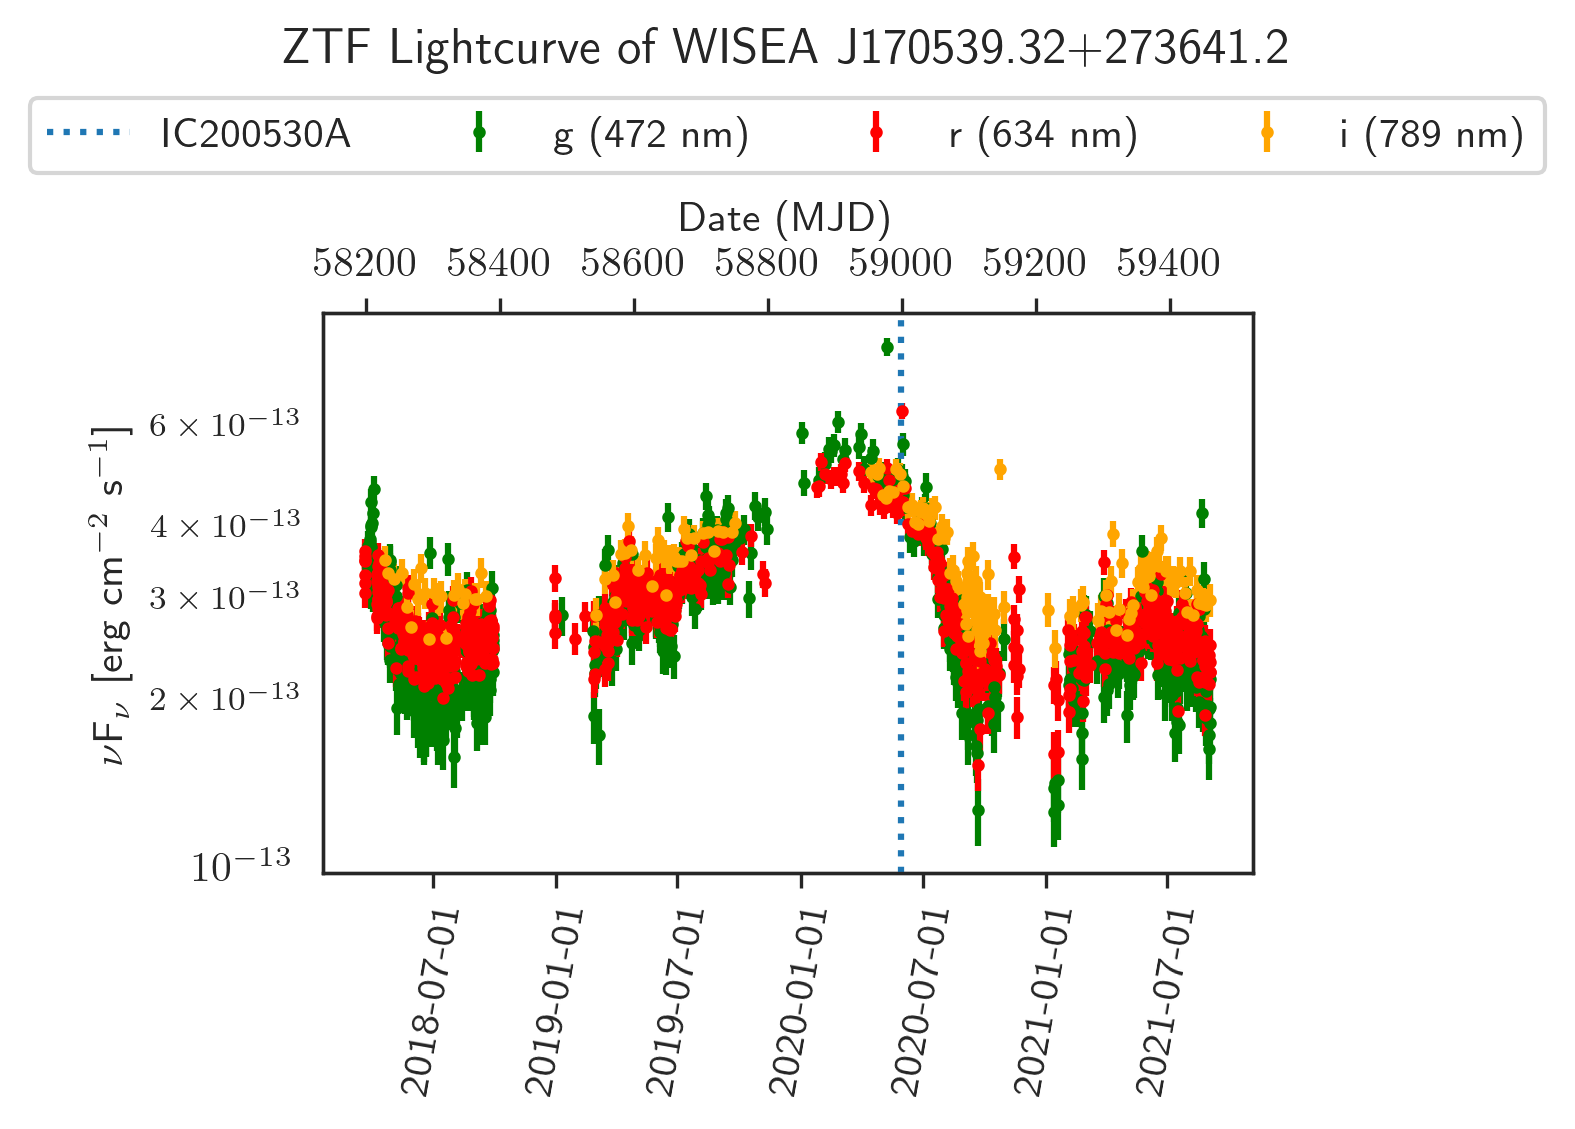

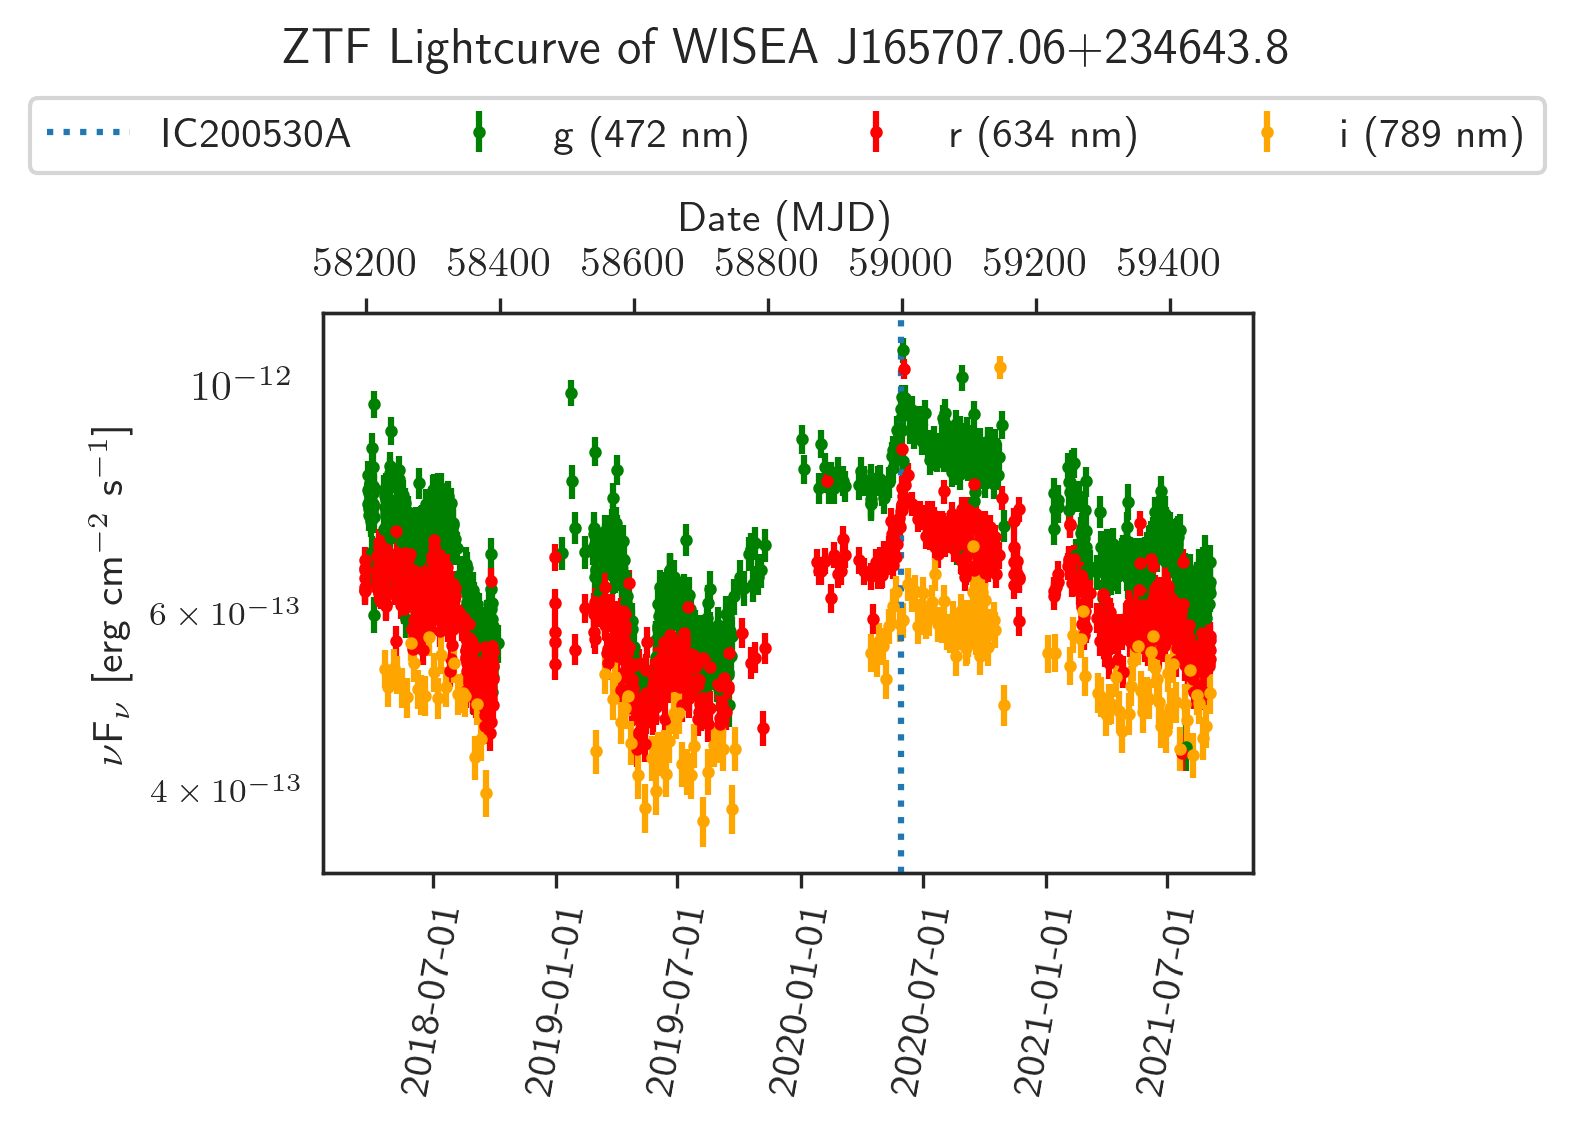

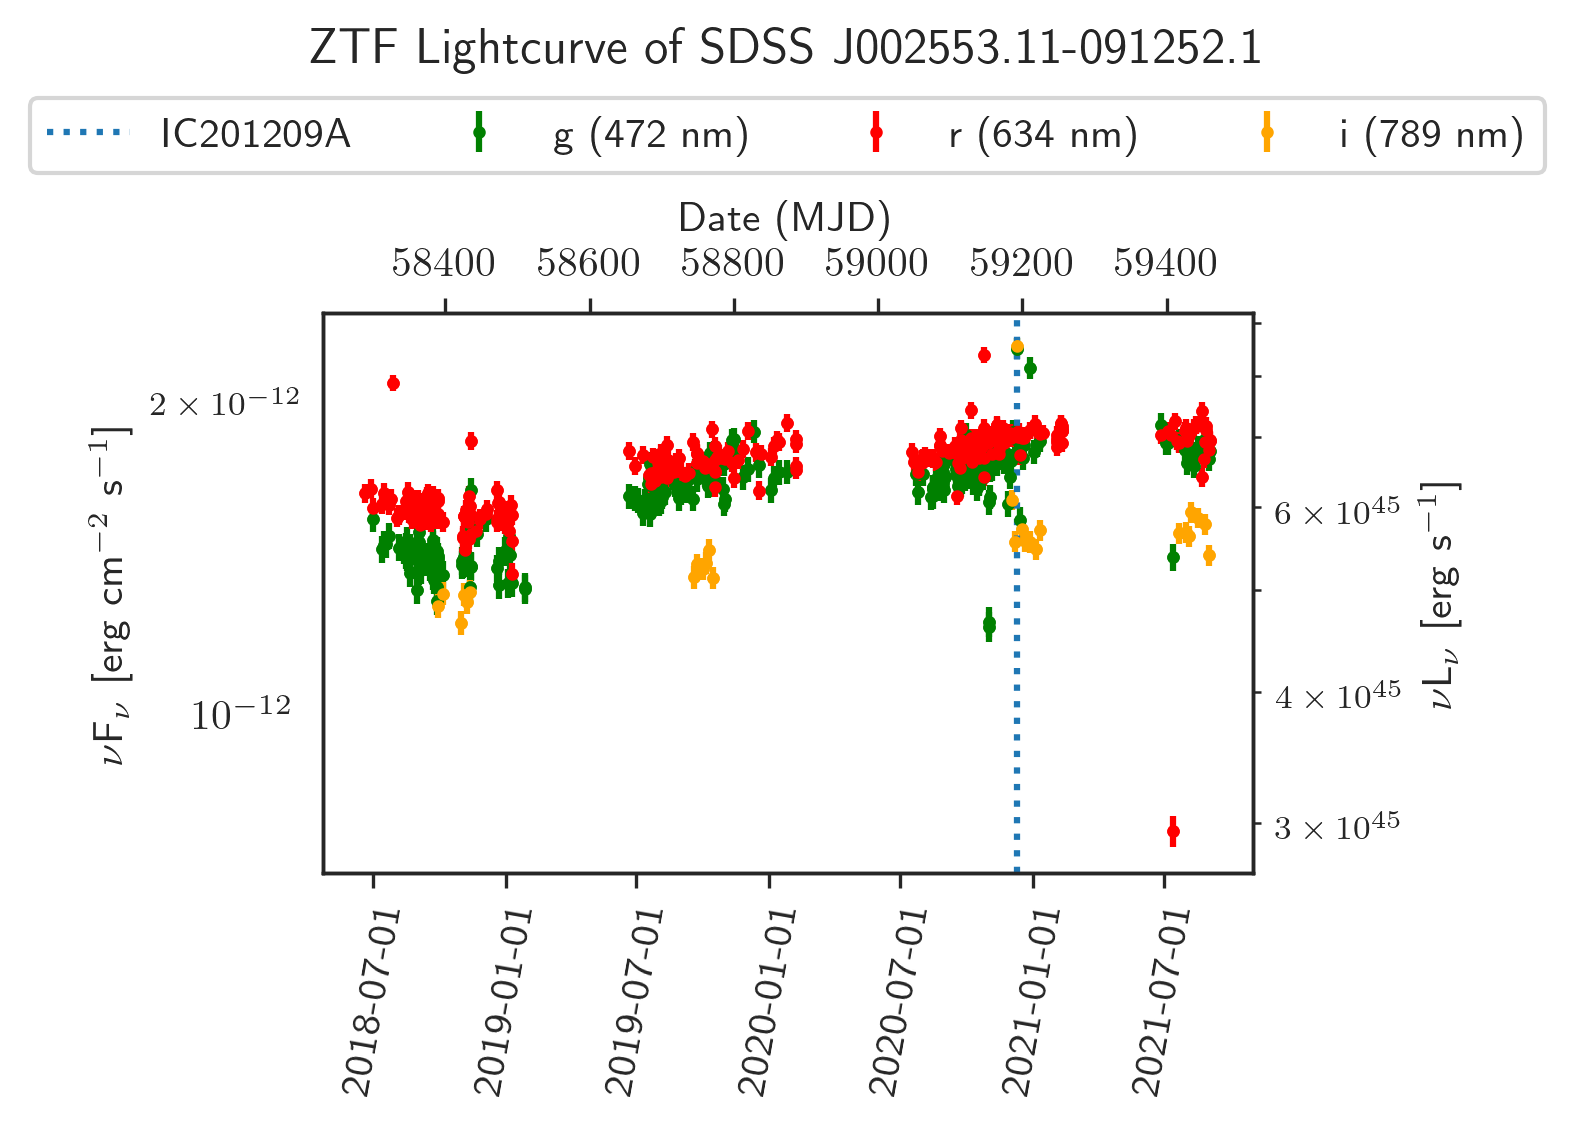

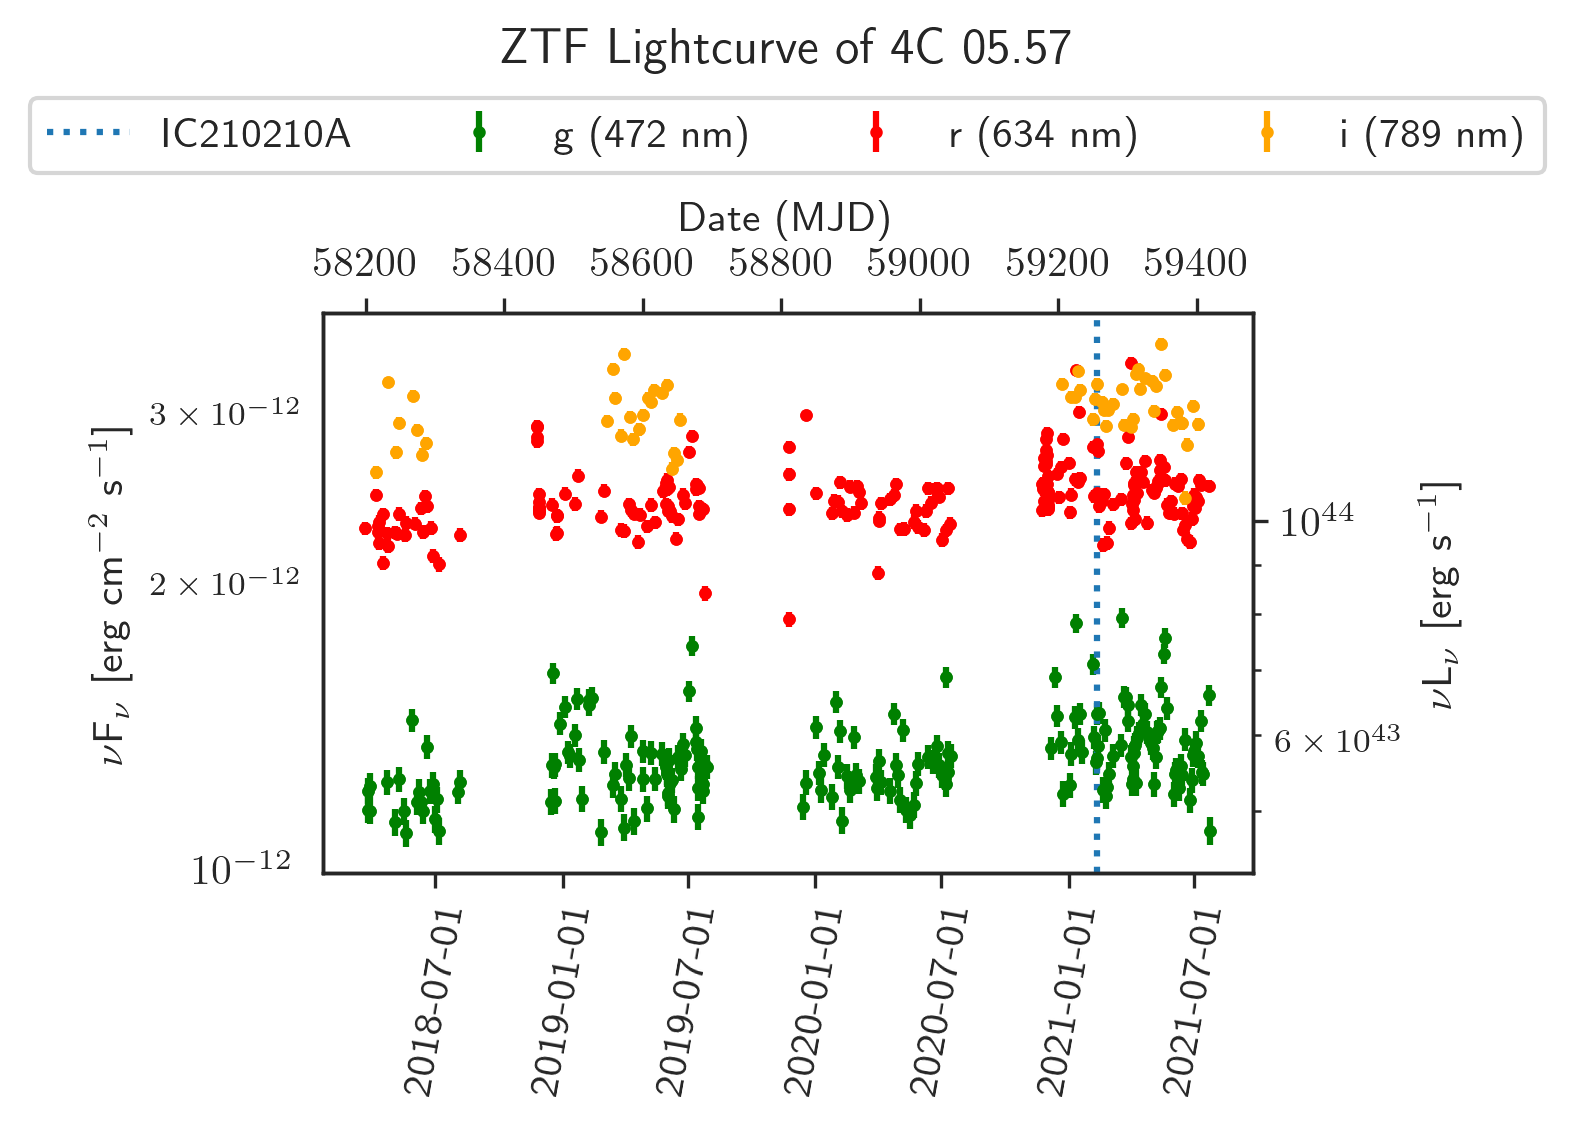

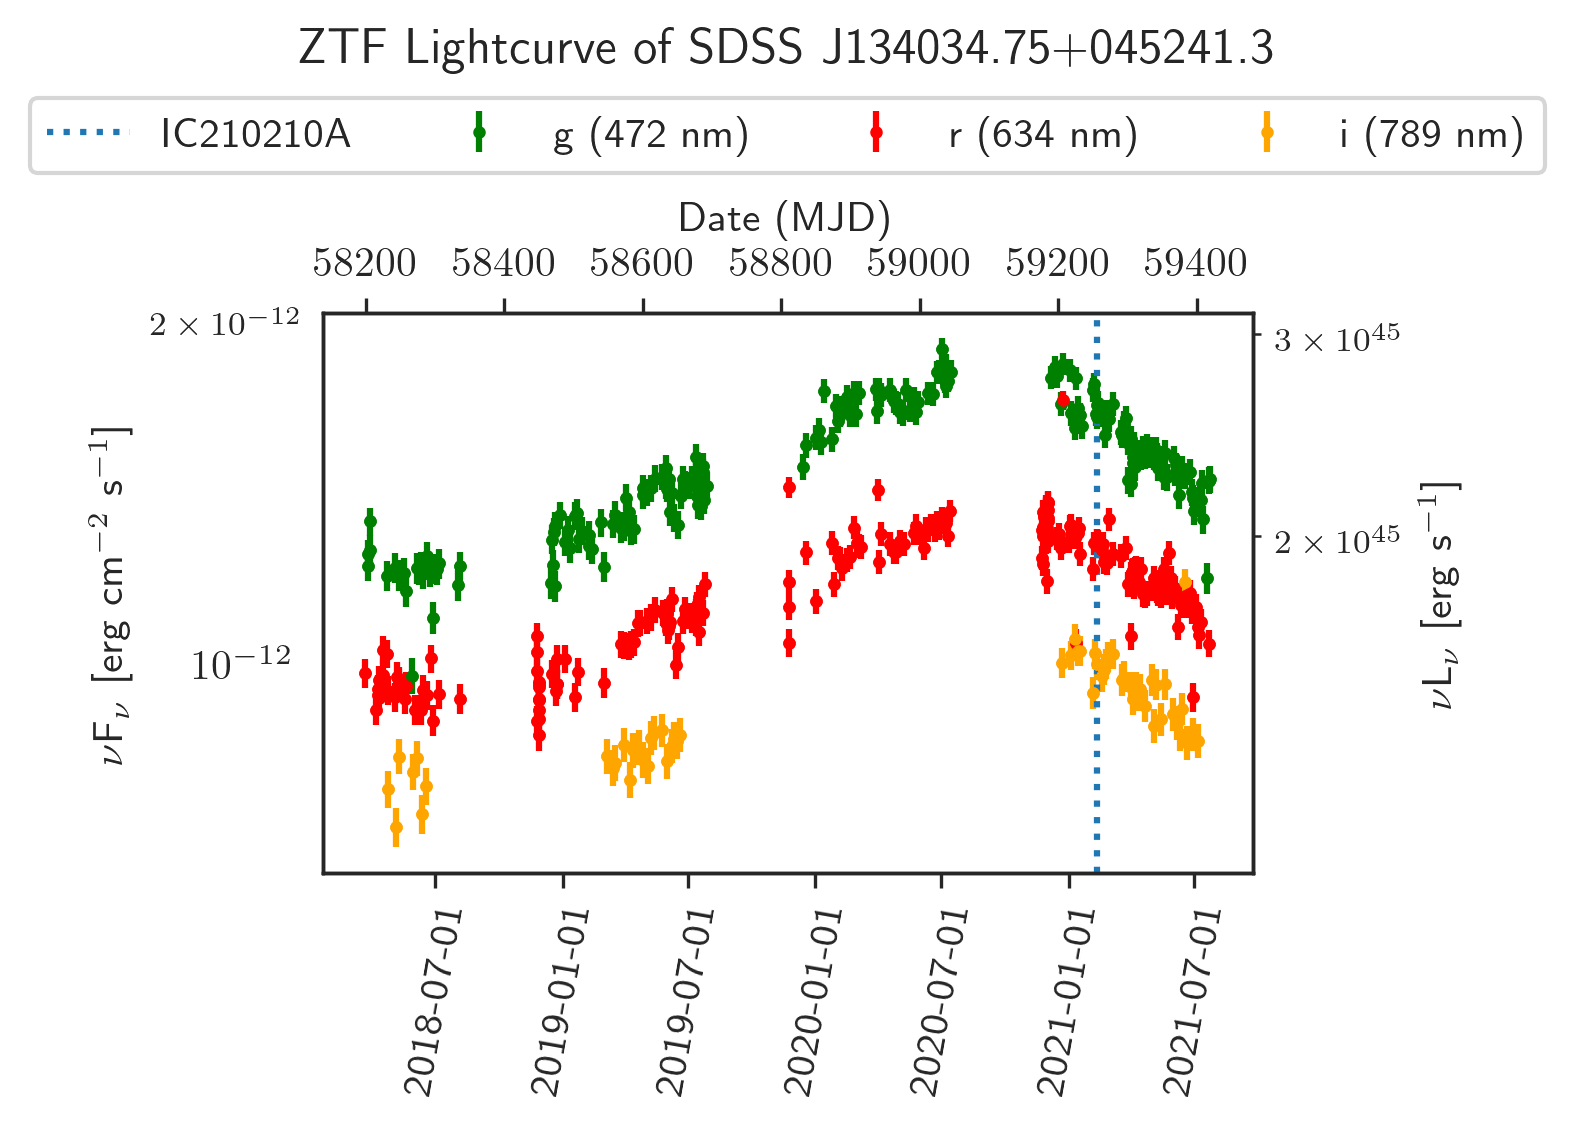

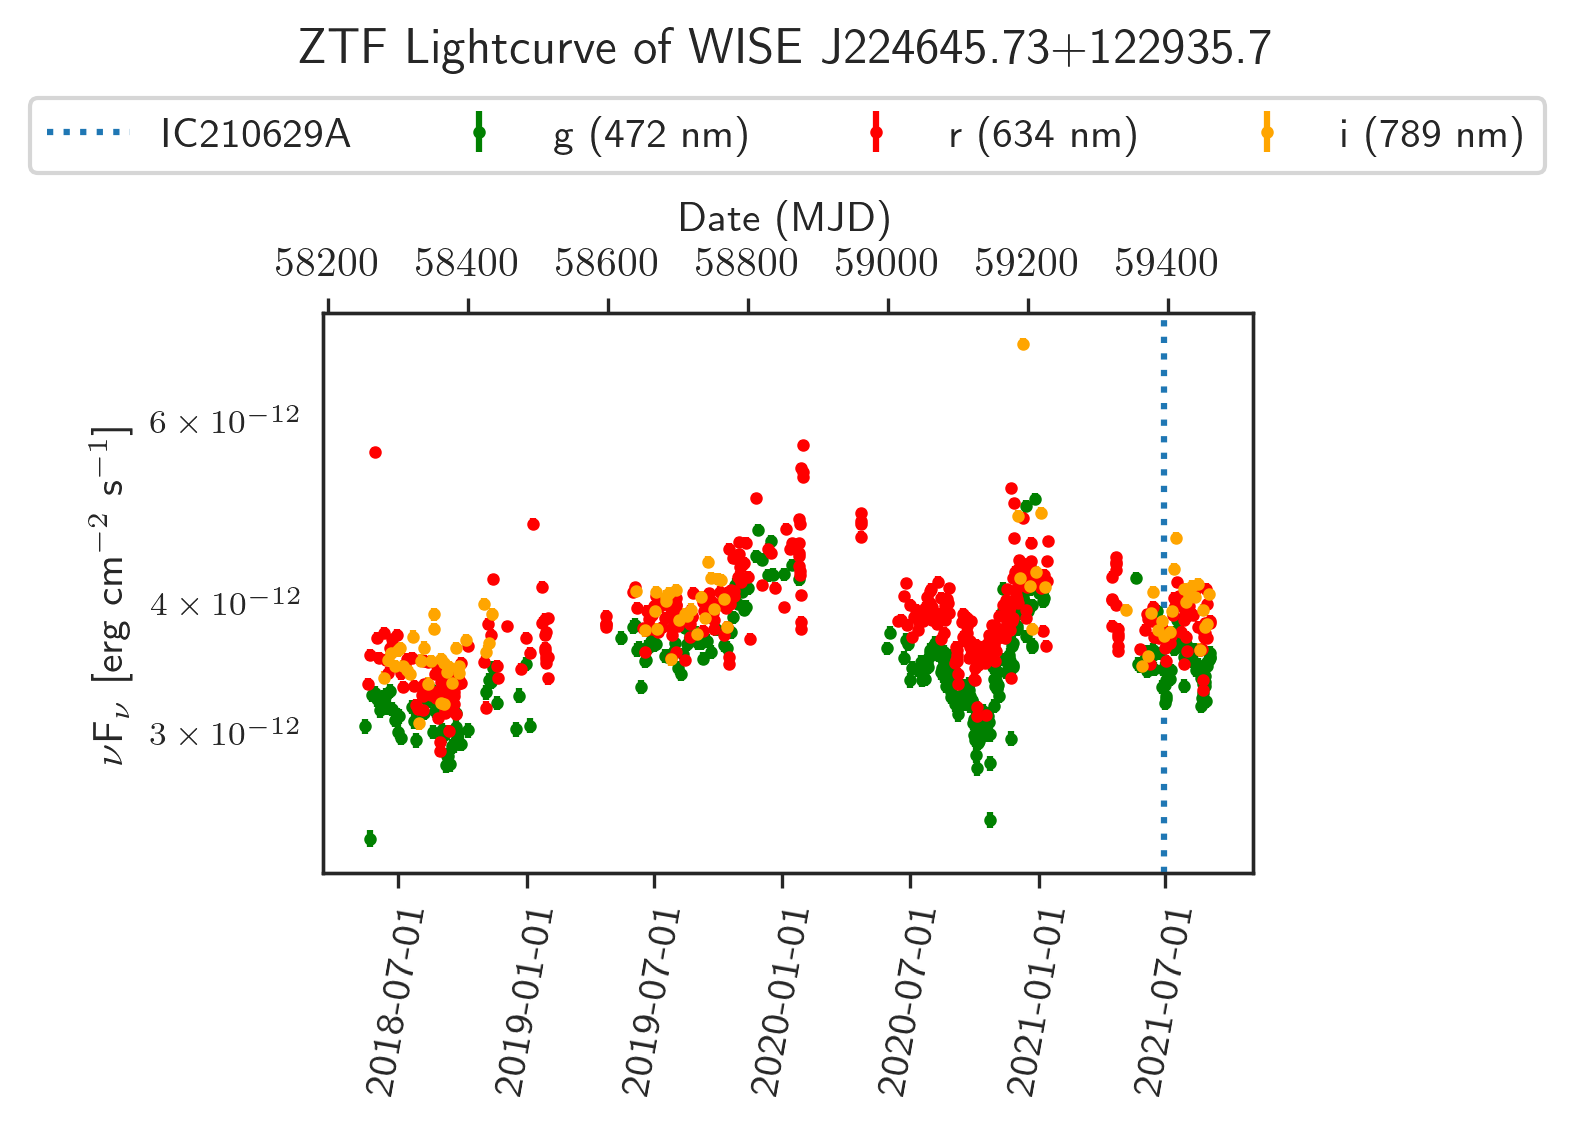

In [4]:
for source, nu_name in names: 
    plot_irsa_lightcurve(
        source,
        nu_name=nu_name,
        plot_mag=False,
        public_folder=output_folder
    )